In [1]:
import numpy as np
import pandas as pd
import re
import datetime
import os
import glob
from matplotlib import pyplot as plt

This is an exploratory analysis of more than 250,000 games extracted from Chess.com's public API.

In [2]:
def all_csv_to_df(subfolder):
    #aggregate all csvs to a dataframe
    all_files = glob.glob(subfolder + "/*.csv")

    li = []

    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        li.append(df)

    combined = pd.concat(li, axis=0, ignore_index=True)
    return combined

In [3]:
def clarify_outcome(termination):
    if "checkmate" in termination:
        outcome = "Checkmate"
    elif "resignation" in termination:
        outcome = "Resignation"
    elif "on time" in termination:
        outcome = "Time"
    elif "repetition" in termination:
        outcome = "Repetition"
    elif "abandoned" in termination:
        outcome = "Abandonment"
    else:
        outcome = "Stalemate"
    return outcome

In [4]:
def clarify_victor(result):
    if result == "1-0":
        victor = 'White'
    elif result =="0-1":
        victor = 'Black'
    else:
        victor = 'Draw'
    return victor

In [5]:
def clarify_data(pgn_df):
    pgn_df['Winner'] = pgn_df.Result.apply(clarify_victor)
    pgn_df['Win Method'] = pgn_df.Termination.apply(clarify_outcome)
    pgn_df['Opening'] = pgn_df['ECOUrl'].str.slice(31)
    return pgn_df

In [6]:
def common_openings_plot(min_elo, max_elo, pgn_df):
    min_elo_filter = pgn_df['WhiteElo'] >= min_elo
    max_elo_filter = pgn_df['WhiteElo'] <= max_elo
    filtered_df = pgn_df[min_elo_filter][max_elo_filter]
    top_openings = filtered_df['Opening'].value_counts(ascending=True)[-10:].plot(kind='barh')
    plt.title(f"Most Common Openings for Games Between {min_elo}-{max_elo} Elo on Chess.com")
    plt.xlabel("Number of Games Observed")
    return top_openings

In [7]:
def top_ten_ECO(min_elo, max_elo, pgn_df):
    min_elo_filter = pgn_df['WhiteElo'] >= min_elo
    max_elo_filter = pgn_df['WhiteElo'] <= max_elo
    filtered_df = pgn_df[min_elo_filter][max_elo_filter]
    top_ten = filtered_df['ECO'].value_counts(ascending=True)[-10:].plot(kind='barh')
    plt.title(f"Top 10 Openings (ECO Reference) for Games Between {min_elo}-{max_elo} Elo on Chess.com")
    plt.xlabel("Number of Games Observed")
    plt.ylabel("ECO Reference")
    return top_ten

In [8]:
def elo_distribution(pgn_df):
    elo_dist = pgn_df['WhiteElo'].plot.hist(bins=20)
    plt.title("Elo Distribution on Chess.com")
    plt.xlabel("Elo")
    plt.ylabel("Frequency")
    return elo_dist

In [9]:
def time_control_plot(min_elo, max_elo, pgn_df):
    min_elo_filter = pgn_df['WhiteElo'] >= min_elo
    max_elo_filter = pgn_df['WhiteElo'] <= max_elo
    filtered_df = pgn_df[min_elo_filter][max_elo_filter]
    top_ten = filtered_df['TimeControl'].value_counts(ascending=True)[-10:].plot(kind='barh')
    plt.title(f"Top 10 Time Control Choice for Games Between {min_elo}-{max_elo} Elo on Chess.com")
    plt.xlabel("Games Observed")
    plt.ylabel("Time Control")
    return top_ten

In [10]:
def winner_dist(min_elo, max_elo, pgn_df):
    min_elo_filter = pgn_df['WhiteElo'] >= min_elo
    max_elo_filter = pgn_df['WhiteElo'] <= max_elo
    filtered_df = pgn_df[min_elo_filter][max_elo_filter]
    winners = filtered_df['Winner'].value_counts(ascending=True)[-10:].plot.pie(autopct='%1.0f%%')
    plt.title(f"Winner or Draw for Games Between {min_elo}-{max_elo} Elo on Chess.com")
    return winners

In [11]:
def win_method_dist(min_elo, max_elo, pgn_df):
    min_elo_filter = pgn_df['WhiteElo'] >= min_elo
    max_elo_filter = pgn_df['WhiteElo'] <= max_elo
    filtered_df = pgn_df[min_elo_filter][max_elo_filter]
    win_method = filtered_df['Win Method'].value_counts(ascending=True)[-10:].plot(kind="pie", autopct='%1.0f%%')
    plt.title(f"Outcome for Games Between {min_elo}-{max_elo} Elo on Chess.com")
    return win_method

In [12]:
%%time
pgn_df = all_csv_to_df(subfolder='raw_pgn_data')
pgn_df.shape

Wall time: 9.43 s


In [36]:
pgn_df = clarify_data(pgn_df)
pgn_df.shape

(270296, 30)

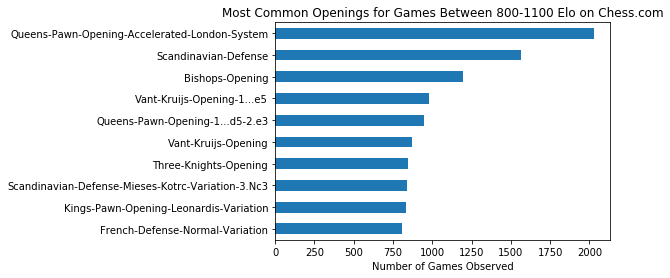

In [35]:
common_openings_plot(800, 1100, pgn_df)

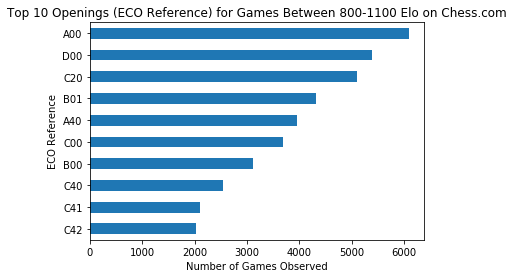

In [17]:
top_ten_ECO(800, 1100, pgn_df)

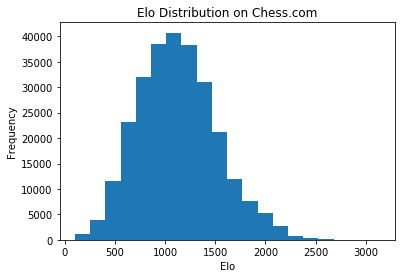

In [18]:
elo_distribution(pgn_df)

In [19]:
np.median(pgn_df['WhiteElo'])

1097.0

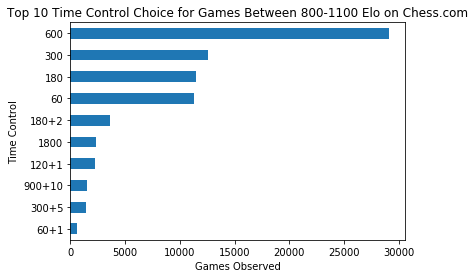

In [20]:
time_control_plot(800, 1100, pgn_df)

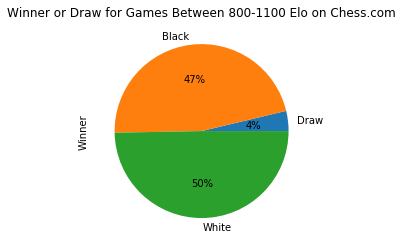

In [21]:
winner_dist(800, 1100, pgn_df)

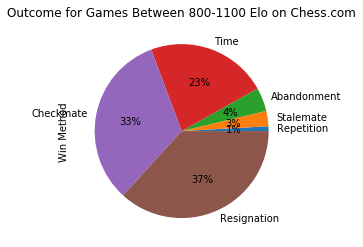

In [22]:
win_method_dist(800, 1100, pgn_df)

In [23]:
def outcome_with_opening_plot(min_elo, max_elo, pgn_df, opening_name):
    min_elo_filter = pgn_df['WhiteElo'] >= min_elo
    max_elo_filter = pgn_df['WhiteElo'] <= max_elo
    opening_filter = pgn_df['Opening'] == opening_name
    filtered_df = pgn_df[min_elo_filter][max_elo_filter][opening_filter]
    winner = filtered_df['Winner'].value_counts(ascending=True)[-10:].plot.pie(autopct='%1.0f%%')
    plt.title(f"Outcome for Games Between {min_elo}-{max_elo} with {opening_name} Elo on Chess.com")
    return winner

In [24]:
def outcome_with_opening(min_elo, max_elo, pgn_df, opening_name):
    min_elo_filter = pgn_df['WhiteElo'] >= min_elo
    max_elo_filter = pgn_df['WhiteElo'] <= max_elo
    opening_filter = pgn_df['Opening'] == opening_name
    filtered_df = pgn_df[min_elo_filter][max_elo_filter][opening_filter]
    winner = filtered_df['Winner'].value_counts(ascending=True)[-10:]
    return winner

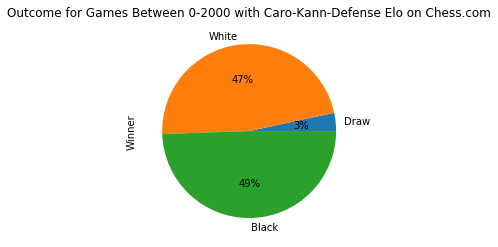

In [37]:
outcome_with_opening_plot(0, 2000, pgn_df, "Caro-Kann-Defense")

In [27]:
#The Filled Bar Chart with Percentages

In [38]:
def common_openings(min_elo, max_elo, pgn_df):
    min_elo_filter = pgn_df['WhiteElo'] >= min_elo
    max_elo_filter = pgn_df['WhiteElo'] <= max_elo
    filtered_df = pgn_df[min_elo_filter][max_elo_filter]
    common_openings = filtered_df['Opening'].value_counts(ascending=True)[-10:]
    return common_openings

In [39]:
#Determine most common openings
indices = list(common_openings(1300, 1600, pgn_df).index)

In [40]:
def outcome_with_top_openings(min_elo, max_elo, pgn_df, openings_list):
    min_elo_filter = pgn_df['WhiteElo'] >= min_elo
    max_elo_filter = pgn_df['WhiteElo'] <= max_elo
    white_wins = []
    black_wins = []
    draw = []
    for opening in openings_list:
        opening_filter = pgn_df['Opening'] == opening
        filtered_df = pgn_df[min_elo_filter][max_elo_filter][opening_filter]
        winner = filtered_df['Winner'].value_counts()[-3:]
        white_wins.append(winner.White)
        black_wins.append(winner.Black)
        draw.append(winner.Draw)
    return (white_wins, black_wins, draw)

In [41]:
win_rates = outcome_with_top_openings(1400, 2200, pgn_df, indices)

In [42]:
plotdata = pd.DataFrame({
    "White":win_rates[0],
    "Black":win_rates[1],
    "Draw":win_rates[2]
    }, index=indices
)
plotdata

,White,Black,Draw
Philidor-Defense,191,196,17
Queens-Pawn-Opening-Horwitz-Defense,336,290,25
French-Defense-Normal-Variation,345,234,23
Vant-Kruijs-Opening,316,327,18
Kings-Pawn-Opening-Owen-Defense,291,211,27
Philidor-Defense-3.Bc4,303,222,20
Bishops-Opening,314,245,24
Sicilian-Defense-Bowdler-Attack,304,301,34
Queens-Pawn-Opening-1...d5-2.e3,320,243,24
Queens-Pawn-Opening-Accelerated-London-System,654,503,65


Text(0, 0.5, 'Opening')

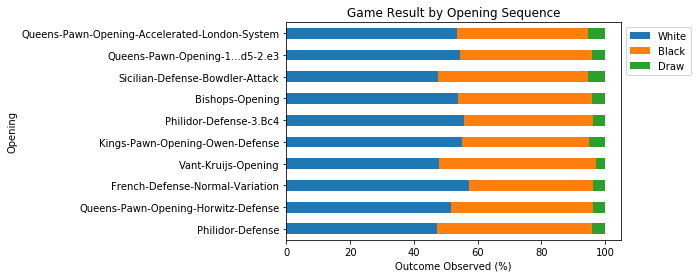

In [43]:
stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="barh", stacked=True).legend(bbox_to_anchor=(1,1))
plt.title("Game Result by Opening Sequence")
plt.xlabel("Outcome Observed (%)")
plt.ylabel("Opening")